# B07c Ray-tracing Data Analysis Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as ip

In this example, we will plot the individual orders of the simulation result for the 400 l/mm grating at a $\mathit{c_{ff}}=2$.

In [2]:
data = {i : pd.read_csv(f"./results/cff_2.0000_order_{i}.csv", skiprows=1) for i in range(1,6)}
fluxes = {i: data[i][['E','Flux']] for i in range(1,6)}
interpolates = {i : ip.CubicSpline(fluxes[i]['E']/i, fluxes[i]['Flux']) for i in range(1,6)}

In the above cell, we have 1. imported the data for all five orders into a dictionary, where the key is the order and the corresponding value is a pandas dataframe.
We then extracted the energy and flux into the fluxes dictionary. 
Another dictionary of interpolated flux was also generated.

Text(0, 0.5, 'Flux / ph s$^{-1}$')

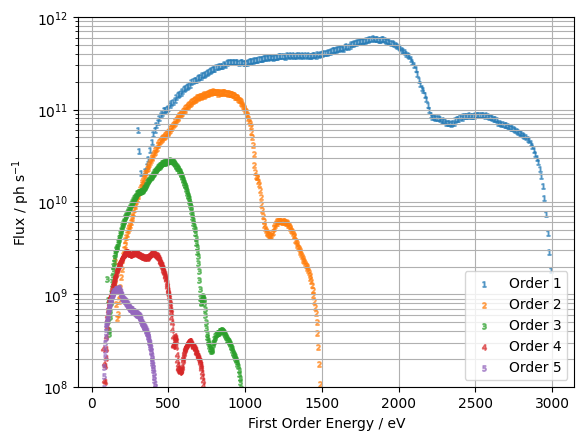

In [3]:
fig, ax = plt.subplots()

for order, result in fluxes.items():
    ax.scatter(result['E'] / order, result['Flux'], marker=f"${order}$", s = 15, label=f"Order {order}", alpha=0.6)
ax.semilogy()
ax.set_ylim(1E8, 1E12)
ax.grid(which='both')
ax.legend()
ax.set_xlabel("First Order Energy / eV")
ax.set_ylabel("Flux / ph s$^{-1}$")

To compare to measurements, the quantity of detector flux will need to be computed. It is a sum of the fluxes weighted by their respective orders:

$$\text{Detector Flux} = \sum_{i \in \text{orders}} i\cdot F_i (E_\text{First Order})$$

where $i$ is the order which is used as an index of summation, in our case it runs from 1 to 5. $F_i(E_\text{First Order})$ is the $i$-th order flux at first order energy.

Text(0, 0.5, 'Flux / ph s$^{-1}$')

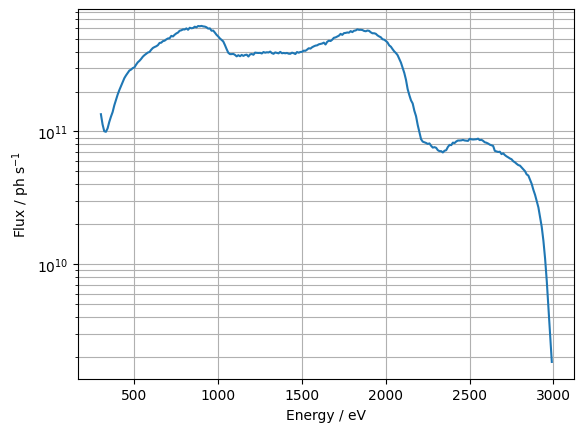

In [4]:
detector = np.sum([i * interpolates[i](fluxes[1]['E']) for i in range(2,6)], axis=0)
detector += fluxes[1]['Flux']

fig, ax = plt.subplots()
ax.plot(fluxes[1]['E'], detector)
ax.semilogy()
ax.grid(which='both')
ax.set_xlabel("Energy / eV")
ax.set_ylabel("Flux / ph s$^{-1}$")